<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/projeto_fake_news_1_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualização dos dados**



In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Projeto - fake news/fakeNews _temp3.json')

In [ ]:
data_df.head(2)

,claim_datetime,claim_first,review_resume,review_datetime,review_title,review_conclusion,news_keyword,news_countries,claims_total,news_type,news_url,news_url_archive,news_part,review_start_time,review_end_time,news_org_location,news_org,news_logo_type,news_logo_url,news_language,news_language_code
0,2019-12-13T00:00:00+00:00,/news_articles/598,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,"[Abandoned Ukraine, Angela Merkel, Emmanuel Ma...","[Russia, Ukraine, The West, EU, Germany, France]","[/claims/75, /claims/79, /claims/80, /claims/8...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,Belarus,sputnik.by // lifenews.ru,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,Russian,rus
1,2019-09-26T00:00:00+00:00,/news_articles/1835,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,"[Conspiracy, Terrorism, Donald Trump]","[Iran, United States, Saudi Arabia]","[/claims/934, /claims/941, /claims/942, /claim...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,https://web.archive.org/web/20190927121413/htt...,None,NaN,NaN,None,southfront.org,None,None,English,eng


##**Palavras mais citadas**

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Função que plota a word cloud**

In [ ]:
def print_words(list_col):
  
  text_string = " ".join(list_col).lower()
  stop_words = STOPWORDS
  word_cloud = WordCloud(stopwords = stop_words, 
                      background_color = "white",
                      collocations=False,
                      width = 1000, height = 500).generate(text_string)

  plt.figure(figsize=(15,8))
  plt.imshow(word_cloud)
  plt.axis("off")
  return plt.show()

**Função que plota gráfico de barras**

In [ ]:
def plot_grafic(df_col):

  #contar as aparições repetidas
  countries_dict = Counter(df_col)
  sorted(countries_dict, key=countries_dict.get)
  countries_dict
  df = pd.DataFrame.from_dict(countries_dict, orient='index')
  df.rename(columns={0: 'Count'}, inplace = True)
  df.index.name = 'Countries'
  df_count_names = df.nlargest(10, 'Count')

  #separar os valores dos eixos do gráfico
  val_num = df_count_names['Count']
  val_name = df_count_names.index

  #construir e plotar o gráfico
  plt.figure(figsize = (12,7))
  plt.barh(val_name, val_num, align='center',color='salmon', edgecolor = 'salmon')
  plt.legend(labels = ['Quantidade mais recorrente'])
  plt.title("FAKE NEWS")
  plt.xlabel('Numbers')
  plt.ylabel('Names')

  return plt.show()

**Função que remove stopwords**

In [ ]:
def remove_stopwords(word_list):
  
  text_garbage = ['\r', '\n', "he\xa0", "»", "«", "'", ",", ".", '"', "?"]
  for i in text_garbage:
    word_list = str(word_list).replace(str(i), '')

  word_list = word_list.lower()
  sentences = []
  sentences = nltk.sent_tokenize(word_list)
  for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    newwords = [word for word in words if word not in stopwords.words('english')]

  return newwords

###**Palavras chaves mais citadas nas notícias originais**

In [ ]:
keyword_list = list(chain(*data_df['news_keyword']))

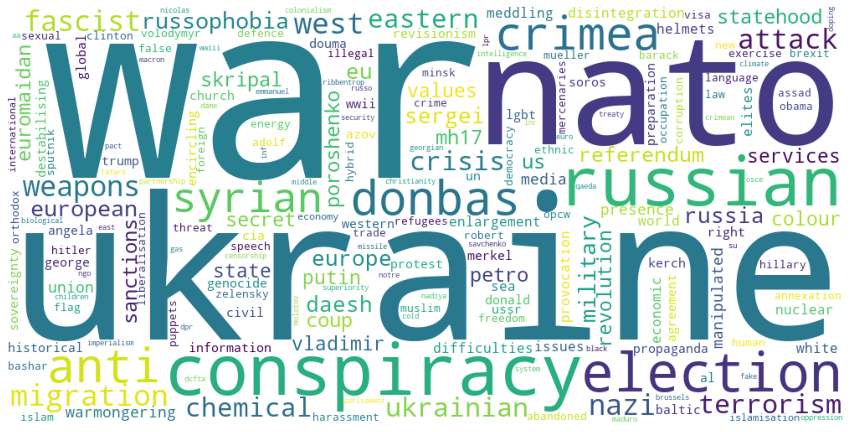

In [ ]:
print_words(keyword_list)

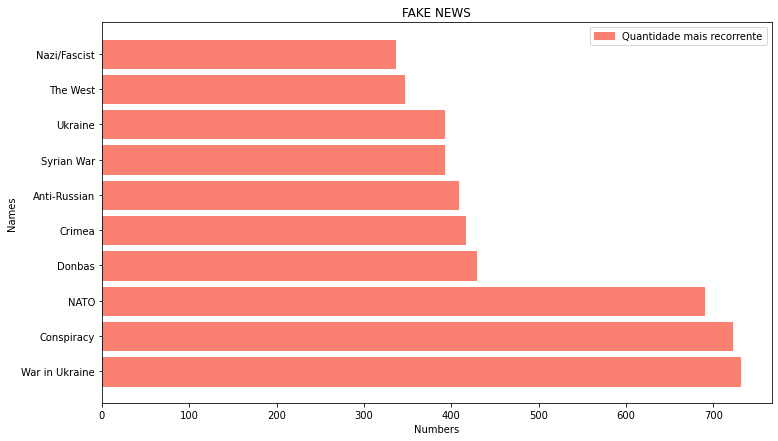

In [ ]:
plot_grafic(keyword_list)

### **Países mais citados nas notícias originais**

In [ ]:
countries_list = list(chain(*data_df['news_countries']))

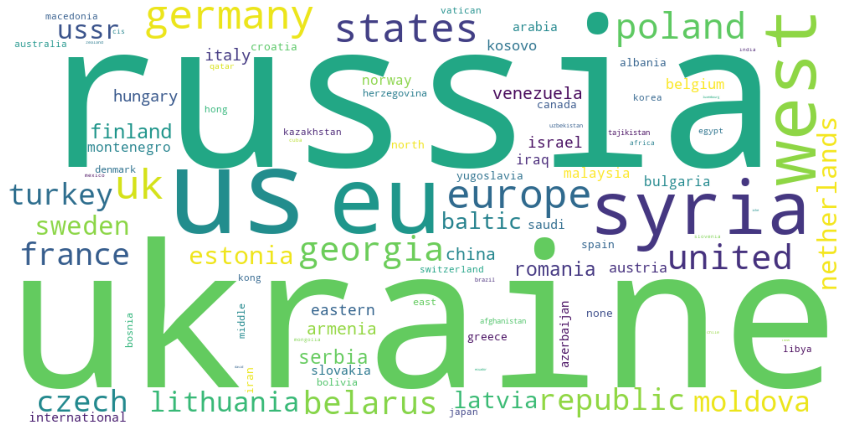

In [ ]:
print_words(countries_list)

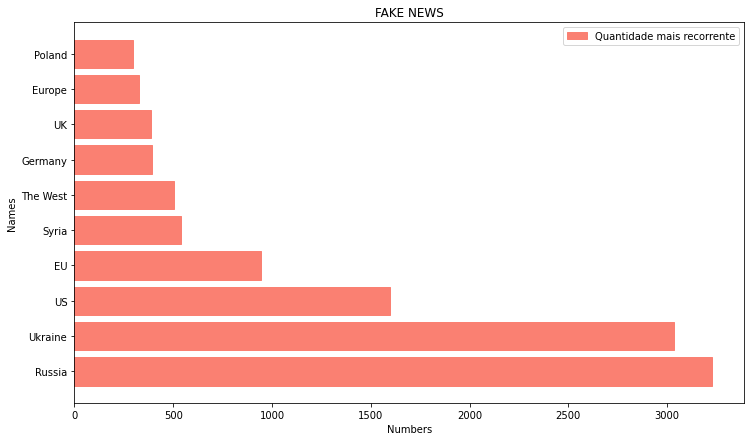

In [ ]:
plot_grafic(countries_list)

###**Palavras mais citadas nos TÍTULOS das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
title_list = list(chain(data_df['review_title']))

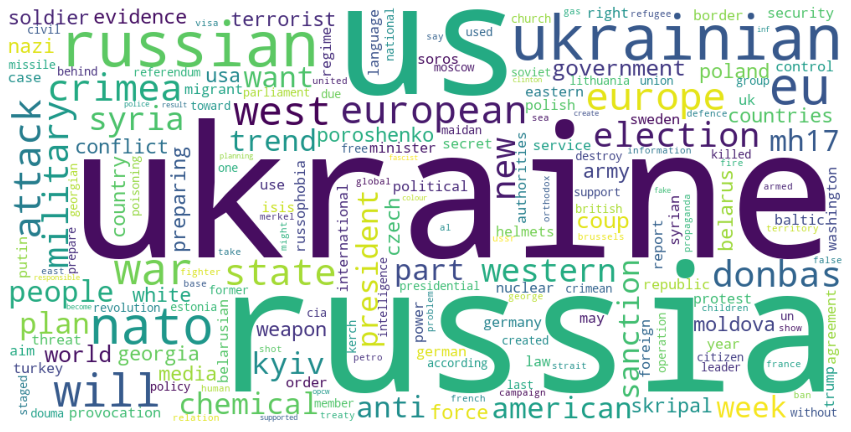

In [ ]:
print_words(title_list)

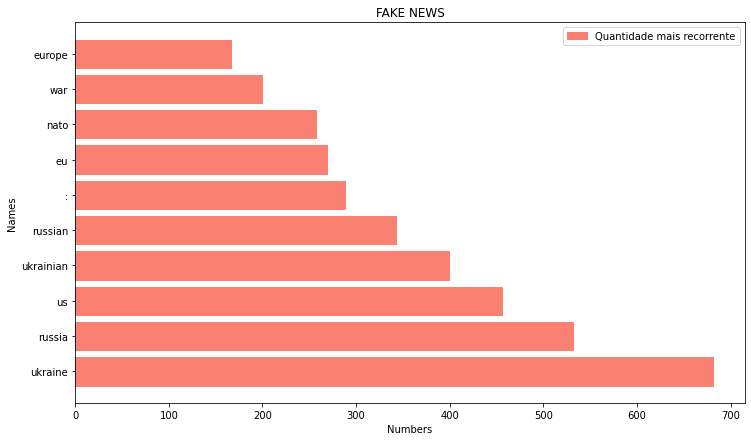

In [ ]:
clean_data = remove_stopwords(title_list)
plot_grafic(clean_data)

###**Palavras mais citadas nos RESUMOS das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
resume_list = list(chain(data_df['review_resume']))

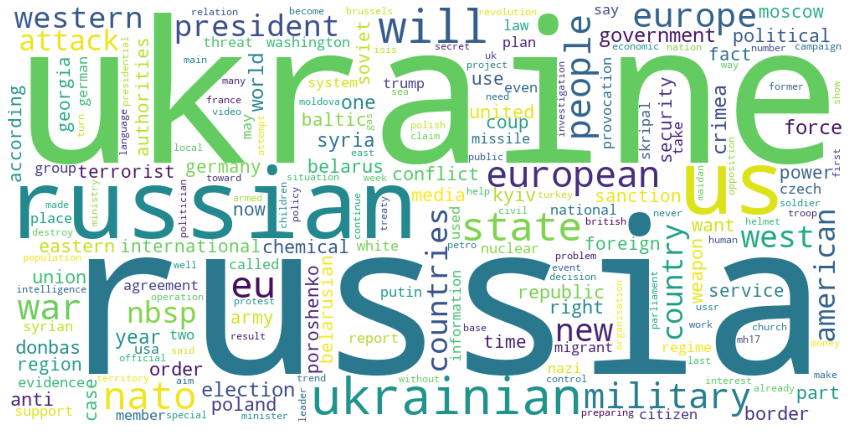

In [ ]:
print_words(resume_list)

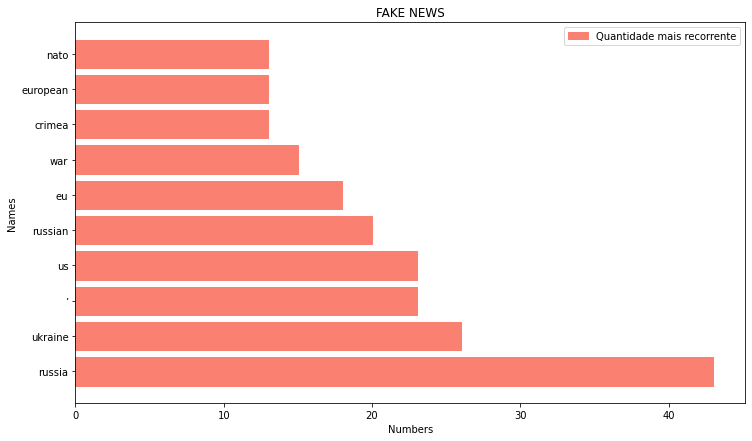

In [ ]:
clean_data = remove_stopwords(resume_list)
plot_grafic(clean_data)

###**Palavras mais citadas nas CONCLUSÕES das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
conclusion_list = list(chain(data_df['review_conclusion']))

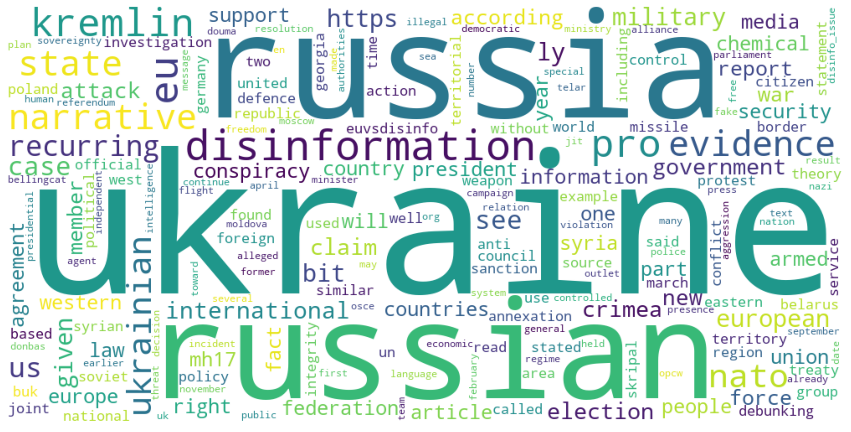

In [ ]:
print_words(conclusion_list)

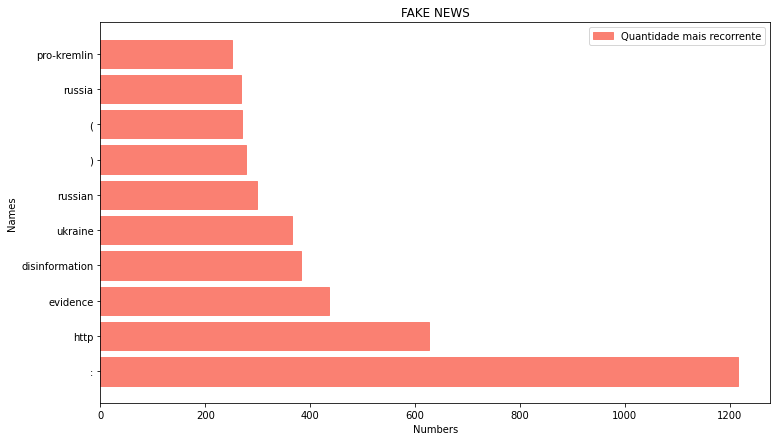

In [ ]:
clean_data = remove_stopwords(conclusion_list)
plot_grafic(clean_data)